/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5505102290986713


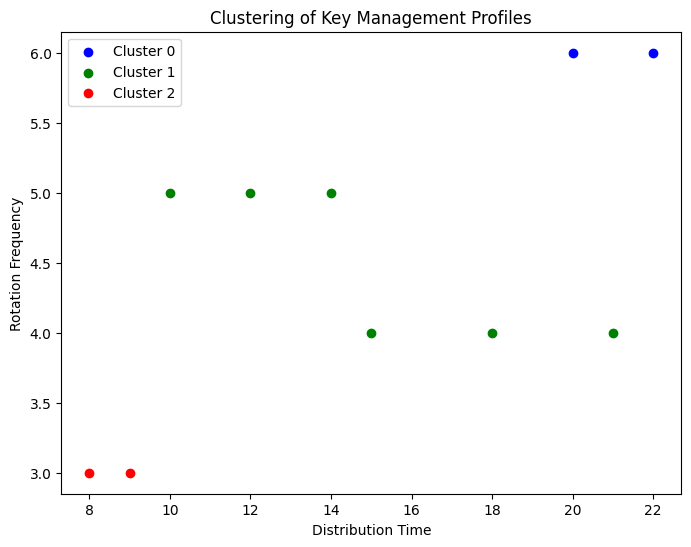

Optimized Distribution Time by Cluster:
Cluster Color: blue, Distribution Time: 21.0
Cluster Color: green, Distribution Time: 15.0
Cluster Color: red, Distribution Time: 8.5

Optimized Rotation Frequency by Cluster:
Cluster Color: blue, Rotation Frequency: 6.0
Cluster Color: green, Rotation Frequency: 4.5
Cluster Color: red, Rotation Frequency: 3.0


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/key_management_data (1).csv')

# Data Preprocessing
processed_data = data[['distribution_time', 'rotation_frequency']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Clustering to identify key management profiles
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Evaluate clustering accuracy
silhouette_avg = silhouette_score(scaled_data, data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Define colors for each cluster
cluster_colors = {0: 'blue', 1: 'green', 2: 'red'}  # Add more colors as needed

# Visualization
plt.figure(figsize=(8, 6))
for cluster_label, color in cluster_colors.items():
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['distribution_time'], cluster_data['rotation_frequency'], c=color, label=f'Cluster {cluster_label}')

plt.xlabel('Distribution Time')
plt.ylabel('Rotation Frequency')
plt.title('Clustering of Key Management Profiles')
plt.legend()
plt.show()

# Optimization
# Example of optimization (not real optimization, just an example)
optimized_distribution_time = data.groupby('cluster')['distribution_time'].mean()
optimized_rotation_frequency = data.groupby('cluster')['rotation_frequency'].mean()

# Display optimized parameters with cluster colors
print("Optimized Distribution Time by Cluster:")
for cluster_label, distribution_time in optimized_distribution_time.items():
    color = cluster_colors[cluster_label]
    print(f"Cluster Color: {color}, Distribution Time: {distribution_time}")

print("\nOptimized Rotation Frequency by Cluster:")
for cluster_label, rotation_frequency in optimized_rotation_frequency.items():
    color = cluster_colors[cluster_label]
    print(f"Cluster Color: {color}, Rotation Frequency: {rotation_frequency}")